#  Predicting heart disease Using Machine Learning

This Project looks into using Machine Learning (Classification) and data science libraries 
to build a machine learning model capable of predicting whether or not someone has heart disease
depending on their medical reports



Steps we are going to take:

1. Problem Definition
2. Data Collection
3. Evaluation
4. Features Engineering
5. Modelling
6. Experimentation

## 1. Problem Definition:

In a statement 

> Given some medical features about a patient, can we guess whether or not they have heart disease?

## 2. Data

>The original data came from the Cleaveland Data from UCI Machine Learning Repo

>There is also another version of it available on Kaggle

## 3. Evaluation

>If we reach 90% accuracy at predicting whether or not patient has heart disease during the proof, we'll persue the project

## 5. Features

From here we'll get information about each of the features

**Create data dictionary**

1. id (Unique id for each patient)

2. age (Age of the patient in years)

3. origin (place of study)

4. sex (Male/Female)

5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

7. chol (serum cholesterol in mg/dl)

8. fbs (if fasting blood sugar > 120 mg/dl)

9. restecg (resting electrocardiographic results)

10. -- Values: [normal, stt abnormality, lv hypertrophy]

11. thalach: maximum heart rate achieved

12. exang: exercise-induced angina (True/ False)

13. oldpeak: ST depression induced by exercise relative to rest

14. slope: the slope of the peak exercise ST segment

15. ca: number of major vessels (0-3) colored by fluoroscopy

16. thal: [normal; fixed defect; reversible defect]

17. num: the predicted attribute

## Preparing the tools

we're going to use Pandas, Matplotlib and Numpy for Data Analysis and Manipulation

In [101]:
# Import all the tools we'll need for the project

# EDA Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# want to appear inside the notebook

# Models from Scikit-Learn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score

## Load Data

In [2]:
df=pd.read_csv('heart-disease.csv')
df.shape # (rows and columns)

(303, 14)

## Data Exploration (Exploratory Data Analysis)

1. Question(s) needs to address?
2. Data types and how we deal with it
3. Missing data preprocess
4. Add, change or remove features to get more from the data

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# How many target class are there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

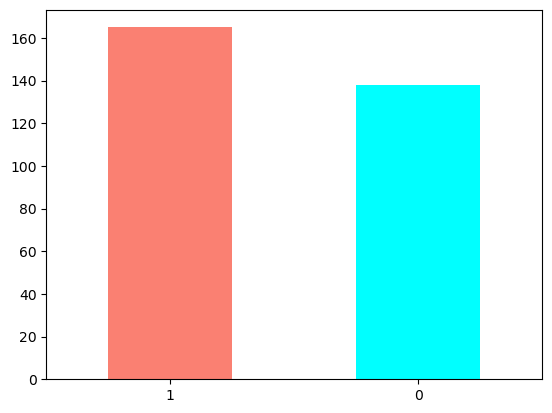

In [7]:
df['target'].value_counts().plot(kind="bar",color=['salmon','cyan']);
plt.xticks(rotation=0);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with the sex coloum
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


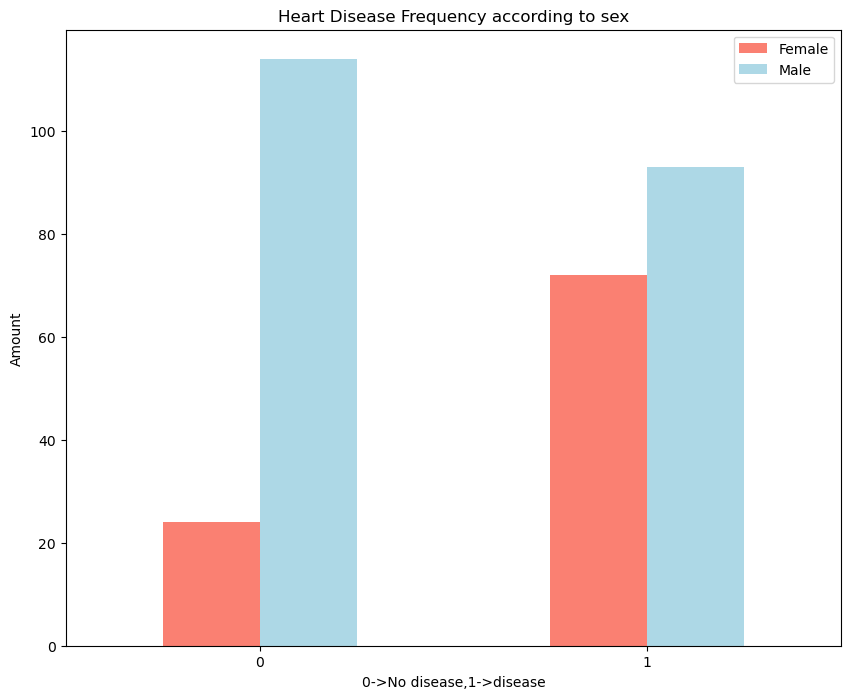

In [12]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,8),
                                  color=['salmon','lightblue'])
plt.title("Heart Disease Frequency according to sex")
plt.xlabel("0->No disease,1->disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

## Age vs max Heart Rate for heart Disease

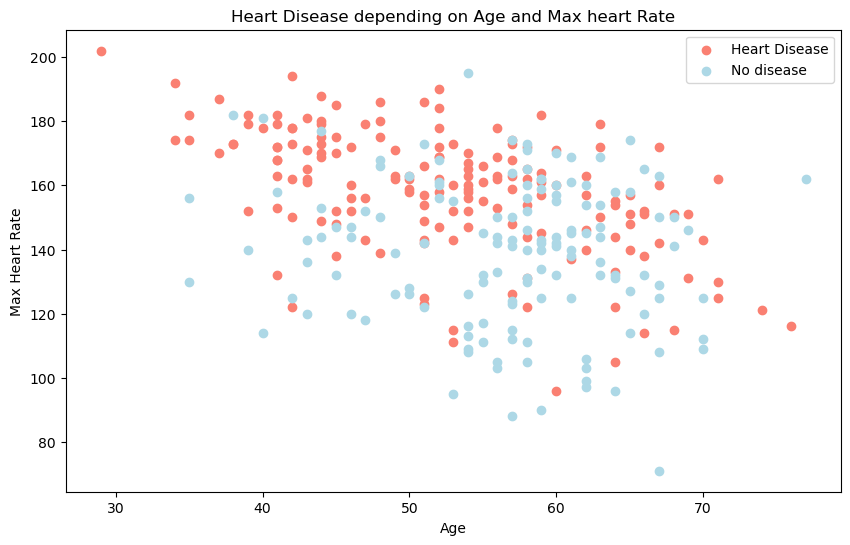

In [13]:
# Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df['target']==1],
           df.thalach[df['target']==1],
           c='salmon')

#Scatter with negative examples
plt.scatter(df.age[df['target']==0],
           df.thalach[df['target']==0],
           c='lightblue');

plt.title("Heart Disease depending on Age and Max heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease","No disease"]);

## Heart Disease Chest Pain Categories
cp chest pain type ([1>typical angina, 2>atypical angina, 3>non-anginal, 4>asymptomatic])

## Heart Disease depending on chest pain

In [14]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


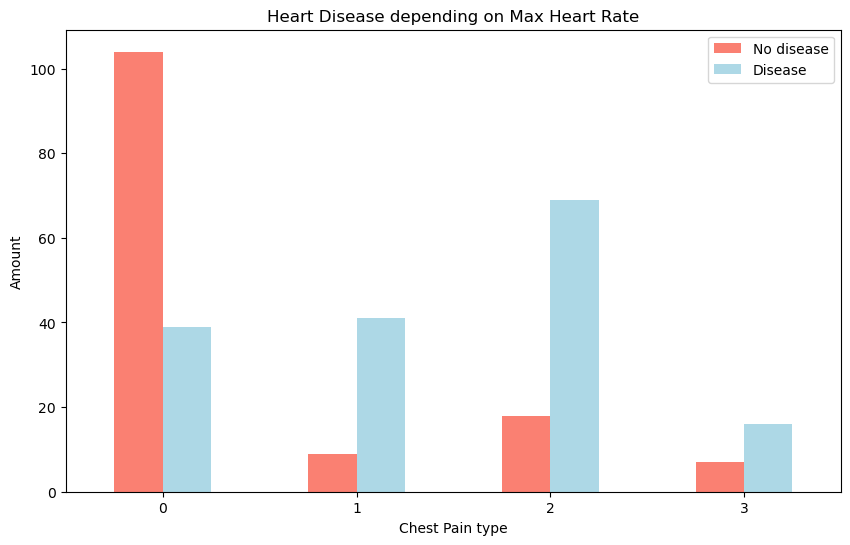

In [16]:
# Making it more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',color=['salmon','lightblue'],figsize=(10,6))

# Making some headings and communication
plt.title("Heart Disease depending on Max Heart Rate")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


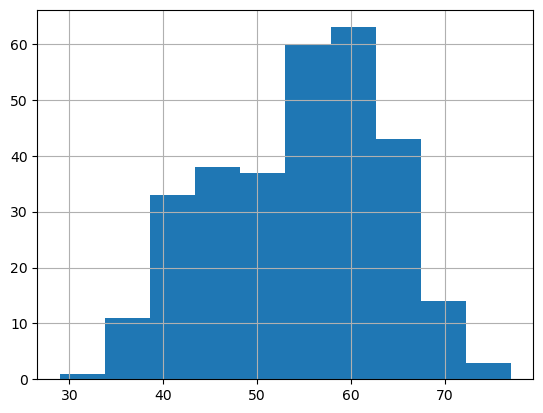

In [18]:
# Check the distribution of the age coloumn with  a histogram
df.age.hist();

In [19]:
# Make a correleation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


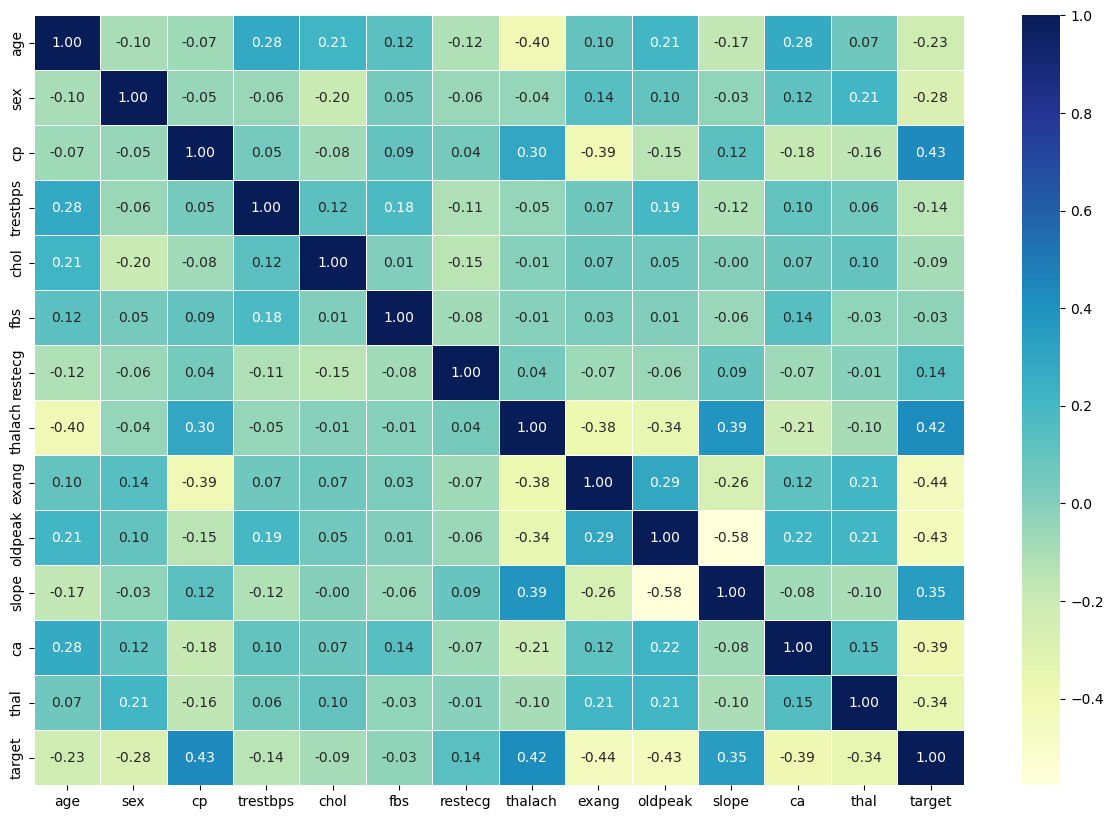

In [20]:
# Make correlation to a visual process
corr_matrix=df.corr()
fix,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')

## Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Split data into X and y
X=df.drop('target',axis=1)
y=df['target']

In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
# Split data into train and tests set

np.random.seed(42)

# Split into train and tests

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [27]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

We have splitted our data, now we can use a machine learning model,
we'll train the data on training sets and test our accuracy for the test sets

## We'll be using 3 machine learning models here
    1. Logistic Regression
    2. RandomForestClassifier
    3. Nearest Neighbours

In [34]:
# Put models in a dictionary
models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

# Creating a function to fit and score models for the data

def fit_and_Score(models,X_train,X_test,y_train,y_test):
     # Setting random seed
    np.random.seed(42)
    
    # Making dictionary to keep the model score
    model_scores={}
    
    # Looping through the models
    for name,model in models.items():
        # Fit the model
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to the model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [42]:
model_scores=fit_and_Score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest')])

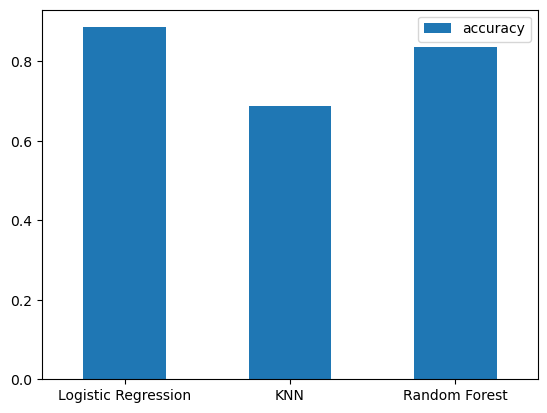

In [40]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();
plt.xticks(rotation=0)

## We got a baseline model but it didnt meet our expectations at all 

Now we can do:
* Hyperparameter tuning
* feature importance
* confusion matrix
* Cross-validation
* precission
* Recall
* F1-score
* Classification report
* ROC Curve
* Area under the curve(AUC)

## Hyperparameter Tuning

In [43]:
# Lets tune knn first
train_scores=[]
test_scores=[]

# Create a list of diffrent values for KNN
neighbours=range(1,21)


# Setup knn
knn=KNeighborsClassifier()

# Looping through different classifier
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train,y_train)
    
    #Update the scores
    train_scores.append(knn.score(X_train,y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [44]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [45]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum knn score on the test data is 75.41%


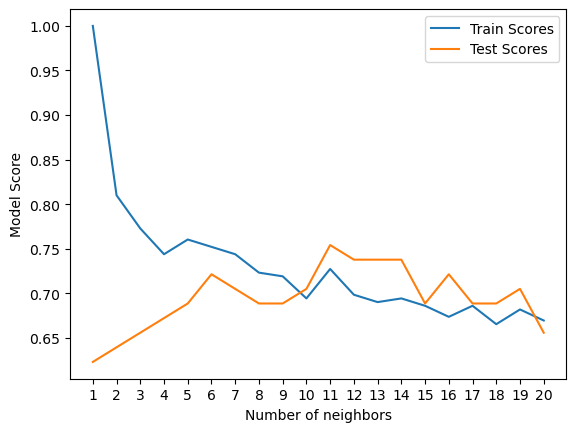

In [51]:
plt.plot(neighbours,train_scores,label="Train Scores")
plt.plot(neighbours,test_scores,label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.legend()
plt.ylabel("Model Score")
print(f"Maximum knn score on the test data is {max(test_scores)*100:.2f}%")

## I think even with the hyperparameters tuning this KNN model is not good for our project

## Hyperparamter tuning with RandomizedSearchCV

## Now we will be tuning our remaining 2 models by Using RandomizedSearchCV
* LogisticRegression
* RandomForestClassifier

In [78]:
# Creating a hyperparameter grid for logistic regression
log_reg_grid={
    "C":np.logspace(-4,4,20),
    "solver":['newtpm-cg','lbfgs','libliner','sag','saga'],
    'penalty':['none','l1','l2','elasticnet']
}

# Creating a hyperparameter grid for RandomForest
rf_grid={
    "n_estimators":np.arange(10,1000,50),
    "max_features":['sqrt','log2']
}


# Parameters all are ready now we can tune using RandomizedSearchCV

In [79]:
# Tuning logisticRegression
np.random.seed(42)

# Setting up random hyperparameter search for logisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

# Fitting the hyperparameter for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myen

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\USER\Deskto

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newtpm-cg', 'lbfgs',
                                                   'libliner', 'sag', 'saga']},
                   verbose=True)

In [80]:
rs_log_reg.best_params_

{'solver': 'lbfgs', 'penalty': 'none', 'C': 3792.690190732246}

In [81]:
rs_log_reg.score(X_test,y_test)

0.8688524590163934

## Let's now tune randomforestclassifier

In [70]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

# Fitting hyperparameters
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_features': ['sqrt', 'log2'],
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [71]:
rs_rf.best_params_

{'n_estimators': 210, 'max_features': 'log2'}

In [72]:
# Evaluation of RandomForestClassifier model

In [73]:
rs_rf.score(X_test,y_test)

0.8524590163934426

In [82]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameters Tuning with gridsearchCV

In [175]:
# Different hyperparameters for the logistic gridsearchcv
log_reg_grid={
    "C":np.logspace(-4,4,30),
    "solver":['newtpm-cg','lbfgs','libliner','sag','saga']
}
#Setting up gridsearch
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

#fit our grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myen

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative s

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative s

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did n

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative s

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative s

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative s

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative s

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myen

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['newtpm-cg', 'lbfgs', 'libliner', 'sag',
                                    'saga']},
             verbose=True)

In [86]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'lbfgs'}

In [87]:
# Evaluate the gridsearch
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## From the evaluation we got the default we found first and by experimenting it is the same value for gridsearchcv

#### Evaluating tuned machine learning classifier
* ROC curve and AUC curve
* Confusion metric
* Classification report
* Precision
* Recall
* F1 score

In [89]:
# Make predictions with tuned model
y_preds=gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

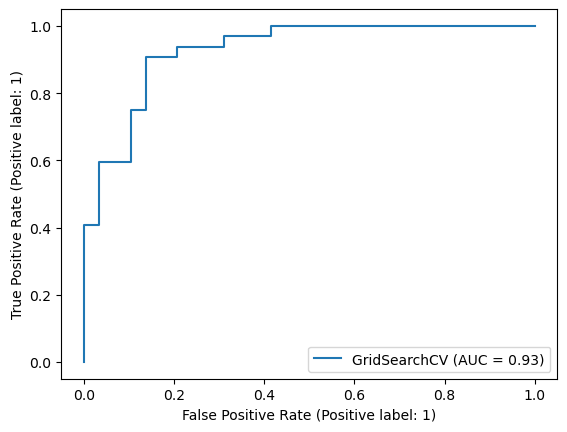

In [92]:
# Importing roc curve function
# Plotting ROC acurve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test);

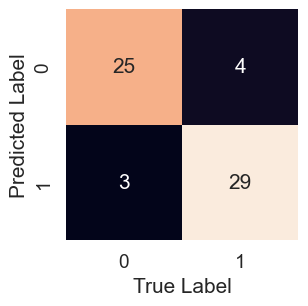

In [94]:
# Confusion Matrix
sns.set(font_scale=1.25)
def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(
    confusion_matrix(y_test,y_preds),annot=True,
        cbar=False
    )
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    
plot_conf_mat(y_test,y_preds);

## Now we got ROC curve and AUC metric and a confusion matrix now its  time to make a classification report

## Calculate evaluation metrics using cross-validation

We'll be using `cross_val_score`

In [95]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'lbfgs'}

In [114]:
# Creating a new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418,solver='lbfgs',max_iter=1000)

In [170]:
# Cross validation accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc=np.mean(cv_acc)
cv_acc


0.8347540983606556

In [141]:
# Cross validated recall
cv_prec=cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_prec=np.mean(cv_prec)
cv_prec

0.8143977591036414

In [142]:
#cross validated recall
cv_rec=cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_rec=np.mean(cv_rec)
cv_rec

0.9090909090909092

In [143]:
#f1 score
cv_f1=cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

0.8581674363006115

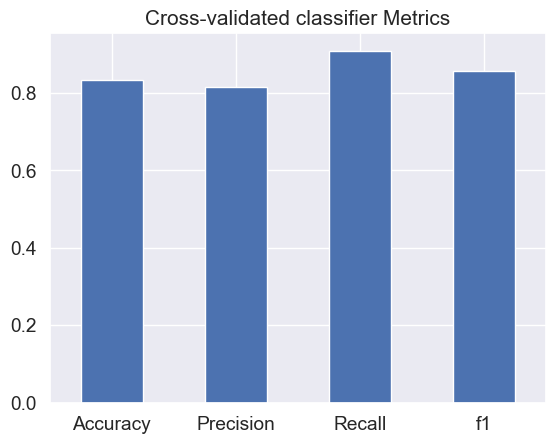

In [173]:
# Visualize cv metrics
cv_metrics=pd.DataFrame({'Accuracy':cv_acc,
                        'Precision':cv_prec,
                        'Recall':cv_rec,
                        'f1':cv_f1},index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classifier Metrics',legend=False)
plt.xticks(rotation=0);

## Since we got the best model now lets find the feature importance for the model

In [176]:
# Fitting an instance of Logistic Reg
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'lbfgs'}

In [177]:
clf=LogisticRegression(C= 0.20433597178569418, solver= 'lbfgs')
clf.fit(X_train,y_train)

C:\Users\USER\Desktop\Data_Science_Basic_Learning\heart-disease-project\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.20433597178569418)

In [179]:
# Checking coef
clf.coef_

array([[ 0.00422039, -0.81964509,  0.644353  , -0.01135438, -0.00149668,
         0.00865776,  0.3179223 ,  0.0251995 , -0.58160282, -0.58643512,
         0.43162074, -0.63265093, -0.74075761]])

In [180]:
coef_dict=dict(zip(df.columns,list(clf.coef_[0])))
coef_dict

{'age': 0.0042203872654130725,
 'sex': -0.819645087826916,
 'cp': 0.6443529959371137,
 'trestbps': -0.011354382267282442,
 'chol': -0.001496682224217366,
 'fbs': 0.008657755303221281,
 'restecg': 0.31792230158938645,
 'thalach': 0.025199504099823307,
 'exang': -0.5816028153321897,
 'oldpeak': -0.5864351175033815,
 'slope': 0.4316207432352301,
 'ca': -0.6326509309363743,
 'thal': -0.7407576135319338}

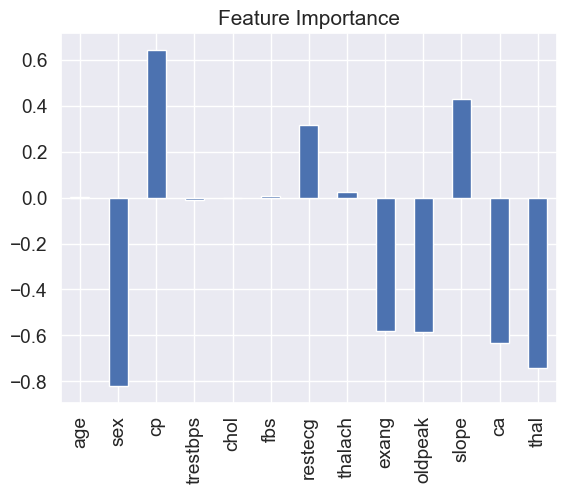

In [183]:
## Visualizing features importance
feature_df=pd.DataFrame(coef_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);